This notebook goes through how to draw the **olympic rings** with **circles**.

# IMPORTS

In [1]:
import matplotlib.pyplot as plt

from spomso.cores.helper_functions import generate_grid, smarter_reshape
from spomso.cores.post_processing import hard_binarization
from spomso.cores.geom_2d import Circle
from spomso.cores.combine import CombineGeometry

# PARAMETERS

In [2]:
# size of the volume
co_size = 5, 3
# resolution of the volume
co_resolution = 500, 300

show = "FIELD" # BINARY, FIELD
show_midplane = True

# COORDINATE SYSTEM

Point cloud of coordinates is created with the **generate_grid** function, which takes the size of the coordinate system and the number of points in each direction (**co_resolution**).

In [3]:
coor, co_res_new = generate_grid(co_size, co_resolution)

If there is an even number of points along any direction the function will automatically convert it to an odd number, therefore the origin is always included in the point cloud. The point cloud is a numpy.ndarray with a shape of **(D, N)**, where **D** is the number of dimensions and **N** is the number of data points.

# CREATE SDFs

Define the radii, widths (thicknesses) and separations between the olympic rings:

In [4]:
radius = 0.6
thickness = 0.05
x_sep = 1.2
y_sep = 0.5

Create the **circles**, convert them into rings with the **onion** modification, and position them in space.

In [5]:
c1 = Circle(radius)
c1.onion(thickness)
c1.move((-x_sep, y_sep/2, 0))

c2 = Circle(radius)
c2.onion(thickness)
c2.move((0, y_sep/2, 0))

c3 = Circle(radius)
c3.onion(thickness)
c3.move((x_sep, y_sep/2, 0))

c4 = Circle(radius)
c4.onion(thickness)
c4.move((-x_sep/2, -y_sep/2, 0))

c5 = Circle(radius)
c5.onion(thickness)
c5.move((x_sep/2, -y_sep/2, 0))

Combine the circles together:

In [6]:
union = CombineGeometry("UNION")
olympic_rings = union.combine(c1, c2, c3, c4, c5)

## EVALUATE

Evaluate the SDF of the **olympic rings** to create a signed distance field 2D map. This is done by calling the **create** method and passing in the point cloud of coordinates:

In [7]:
olympic_rings_pattern = olympic_rings.create(coor)

# BINARIZATION

Convert the distance field to a binary voxel map, where 1 corresponds to the interior and 0 to the exterior of the geometry.

In [8]:
if show_midplane:
    field = smarter_reshape(olympic_rings_pattern, co_resolution)
    if show=="BINARY":
        pattern_2d = hard_binarization(field, 0)

# PLOT

Drawing results...
(501, 301)


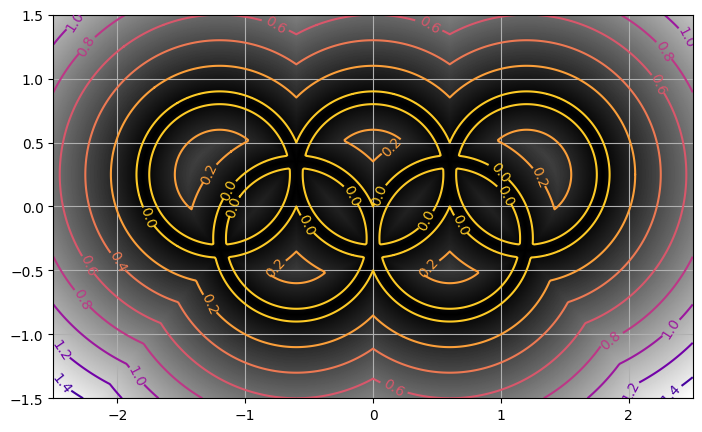

In [9]:
print("Drawing results...")
# Mid-plane cross-section plot
if show_midplane and show=="BINARY":
    fig, ax = plt.subplots(1,1, figsize=(8.25, 8.25))
    ax.imshow(pattern_2d[:, :].T,
              cmap="binary_r",
              extent=(-co_size[0]/2, co_size[0]/2,
                      -co_size[1]/2, co_size[1]/2),
              origin="lower"
              )
    ax.grid()

    fig.tight_layout()
    plt.show()

if show_midplane and show == "FIELD":
    fig, ax = plt.subplots(1, 1, figsize=(8.25, 8.25))
    print(field.shape)
    ax.imshow(field[:, :].T,
              cmap="binary_r",
              extent=(-co_size[0] / 2, co_size[0] / 2,
                      -co_size[1] / 2, co_size[1] / 2),
              origin="lower"
              )
    cs = ax.contour(coor[0].reshape(co_res_new[0], co_res_new[1]),
                    coor[1].reshape(co_res_new[0], co_res_new[1]),
                    field[:, :],
                    cmap="plasma_r")
    ax.clabel(cs, inline=True, fontsize=10)
    ax.grid()